## Desaf√≠o - An√°lisis lineal discriminante

- Para realizar este desaf√≠o debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.

- Una vez terminado el desaf√≠o, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.

- Desarrollo desaf√≠o:

  -El desaf√≠o se debe desarrollar de manera Individual.
  
  -Para la realizaci√≥n del desaf√≠o necesitar√°s apoyarte del archivo Apoyo Desaf√≠o An√°lisis lineal discriminante.
    
## Requerimientos

Trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de √©sta se registran las siguientes observaciones:

- **`default`**: Variable Binaria. Registra si el cliente entr√≥ en morosidad o no.
- **`income`**: Ingreso promedio declarado por el cliente.
- **`balance`**: total del saldo en la cuenta de cr√©dito.
- **`student`**: Variable binaria. Registra si el cliente es estudiante o no.

## Ejercicio 1: Preparaci√≥n de ambiente de trabajo

- Importe los m√≥dulos b√°sicos para el an√°lisis de datos.
- Importe las clases **`LabelEncoder`**, **`StandardScaler`** y **`LabelBinarizer`** de **`preprocessing.`**
- Importe las funciones **`train_test_split`** y **`cross_val_score`** de **`model_selection.`**
- Importe la funci√≥n **`classification_report de metrics.`**
- Importe las clases **`LinearDiscriminantAnalysis`** y **`QuadraticDiscriminantAnalysis.`**
- Agregue la base de datos en el ambiente de trabajo.
- Inspeccione la distribuci√≥n de cada atributo.



In [1]:
# Triada calsica.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Graficos seaborn, warnings y datos perdidos.
import seaborn as sns
import warnings
import missingno as msngo

# Importaciones especificas de este desafio.
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

# Machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# Otras librerias, configuraciones e instancias.
import func as gfx

labelencoder = LabelEncoder()
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('default_credit.csv').drop(columns = 'index')
df.head()

default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879

In [3]:
df_describe = df

In [4]:
# Implementamos el m√©todo fit_transform astype para trasnformar los valores
df_describe['default'] = labelencoder.fit_transform(df_describe['default'])
df_describe['student'] = labelencoder.fit_transform(df_describe['student'])
df_describe.head()

default  student      balance        income
0        0        0   729.526495  44361.625074
1        0        1   817.180407  12106.134700
2        0        0  1073.549164  31767.138947
3        0        0   529.250605  35704.493935
4        0        0   785.655883  38463.495879

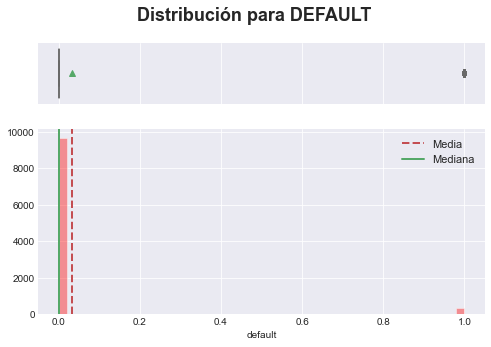

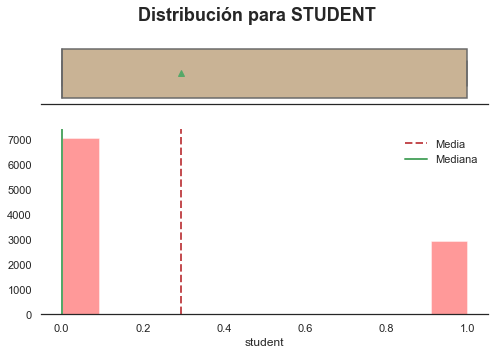

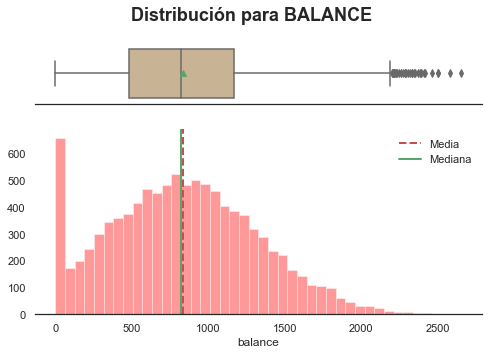

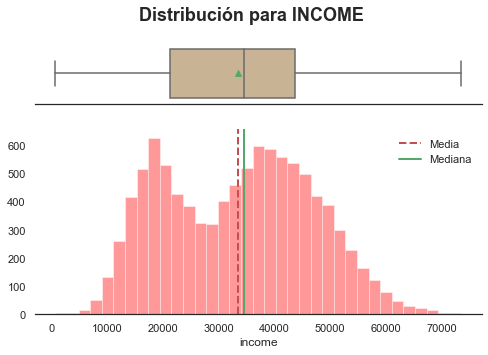

In [5]:
name_vars = ['default', 'student', 'balance', 'income']

for i in range(len(name_vars)):
        gfx.dist_box(df_describe[name_vars[i]])

## Ejercicio 2: Modelo base
- Recuerde que los modelos de **`sklearn`** no soportan datos que no sean num√©ricos. 
- Transforme los atributos pertinentes con **`LabelEncoder.`**
- Genere muestras de validaci√≥n y entrenamiento, reservando un 33% de los datos como validaci√≥n.
- Genere un modelo con **`LinearDiscriminantAnalysis`** sin modificar los hiper par√°metros. Genere m√©tricas de evaluaci√≥n utilizando **`classification_report.`**
- Comente sobre cu√°l es el desempe√±o del modelo en cada clase, as√≠ como en general.

In [6]:
df_discriminant = df

In [7]:
# recodificaci√≥n variables categoricas
df_discriminant['default'] = labelencoder.fit_transform(df_discriminant['default'])
df_discriminant['student'] = labelencoder.fit_transform(df_discriminant['student'])
df_discriminant.head()

default  student      balance        income
0        0        0   729.526495  44361.625074
1        0        1   817.180407  12106.134700
2        0        0  1073.549164  31767.138947
3        0        0   529.250605  35704.493935
4        0        0   785.655883  38463.495879

In [8]:
df_discriminant['default'].value_counts()

0    9667
1     333
Name: default, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_discriminant.loc[:, 'student':'income'], df_discriminant['default'], test_size = .33, random_state = 15820)
X_train.shape

(6700, 3)

In [10]:
clf_discriminant = LinearDiscriminantAnalysis()
clf_discriminant.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
# metricas de desempe√±o
predic = clf_discriminant.predict(X_test)
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3194
           1       0.77      0.28      0.41       106

    accuracy                           0.97      3300
   macro avg       0.87      0.64      0.70      3300
weighted avg       0.97      0.97      0.97      3300



El modelo sin hiperparametros es muy malo prediciendo los clientes morosos, y muy bueno evaluando a los no morosos, se debe buscar una estrategia para tratar la base de datos ya que las clases estan muy desbalanceadas

## Ejercicio 3: Refactorizaci√≥n 1 - informaci√≥n a priori
- Dado que trabajamos con modelos generativos, podemos incluir informaci√≥n ex√≥gena. Para este caso agregaremos dos distribuciones:
    - Asumamos que hay un 50/50 de morosos y no morosos.
    - Asumamos que hay un 60/40 de morosos y no morosos.
- Por cada modelo, reporte las m√©tricas de clasificaci√≥n.

In [12]:
# Asumamos que hay un 50/50 de morosos y no morosos.
linear_discriminant = LinearDiscriminantAnalysis(priors = [50, 50])
linear_discriminant.fit(X_train, y_train)

LinearDiscriminantAnalysis(priors=[50, 50])

In [13]:
# metricas de desempe√±o
predic1 = linear_discriminant.predict(X_test)
print(classification_report(y_test, predic1))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      3194
           1       0.15      0.91      0.26       106

    accuracy                           0.84      3300
   macro avg       0.57      0.87      0.58      3300
weighted avg       0.97      0.84      0.89      3300



In [14]:
# Asumamos que hay un 60/40 de morosos y no morosos.
linear_discriminant1 = LinearDiscriminantAnalysis(priors = [60, 40])
linear_discriminant1.fit(X_train, y_train)

LinearDiscriminantAnalysis(priors=[60, 40])

In [15]:
# metricas de desempe√±o
predic2 = linear_discriminant.predict(X_test)
print(classification_report(y_test, predic2))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      3194
           1       0.15      0.91      0.26       106

    accuracy                           0.84      3300
   macro avg       0.57      0.87      0.58      3300
weighted avg       0.97      0.84      0.89      3300



## Ejercicio 4: Refactorizaci√≥n 2 - oversampling
### Digresi√≥n: Synthetic Over(Under)Sampling
- Por lo general podemos intentar aliviar el problema del desbalance de clases
  mediante la ponderaci√≥n dentro del algoritmo. Otra alternativa es el muestreo con
  reemplazo dentro de los conjuntos de entrenamiento. Estos m√©todos cl√°sicos se
  conocen como **`Oversampling`** cuando repetimos registros aleatorios de la clase
  minoritaria, y **`Undersampling`** cuando eliminamos aleatoriamente registros de la
  clase mayoritaria.
- Un contratiempo de estos m√©todos cl√°sicos es que pueden replicar informaci√≥n
  sesgada que afecte el desempe√±o de generalizaci√≥n del modelo. Si los datos son
  malos, estaremos replicando estas fallas.
- Otra soluci√≥n es generar ejemplos de entrenamiento sint√©ticos mediante el
  entrenamiento de ejemplos de la clase minoritaria. A grandes rasgos la soluci√≥n
  funciona de la siguiente forma: En funci√≥n a un subconjunto de datos
  correspondientes a la clase minoritaria, entrenamos alg√∫n modelo no supervisado o
  generativo como Naive Bayes, KMeans o KNearestNeighbors para generar
  representaciones sint√©ticas de los datos en el espacio de atributos de la clase
  espec√≠fica mediante ùë• es un ejemplo de
  ùëõùë¢ùëíùë£ùëú‚àíùëíùëóùëíùëöùëùùëôùëú = ùë• ùëñ + Œª(ùë• ùëßùëñ ‚àí ùë• ùëñ) entrenamiento de la clase minoritaria y Œª es un par√°metro de interpolaci√≥n    aleatorio Œª ‚àº ùëàùëõùëñùëìùëúùëüùëöùëí(0, 1).
  
- Uno de los problemas m√°s graves de esta base de datos, es el fuerte desbalance
  entre clases. Ahora generaremos observaciones sint√©ticas mediante SMOTE
  (Synthetic Minority Oversampling Technique). Para ello, debemos agregar el paquete
  a nuestro ambiente virtual. En nuestro terminal agregamos conda install -c
  conda-forge imbalanced-learn. Incorpore SMOTE en el ambiente de trabajo con
  la siguiente sint√°xis from imblearn.over_sampling import SMOTE.
  
- Para implementar oversampling, debemos generar nuevos objetos que representan
  nuestra muestra de entrenamiento incrementada artificialmente. Para ello
  implemente la siguiente sintaxis:
  
- Vuelva a entrenar el modelo con los datos aumentados de forma artificial y comente sobre su desempe√±o.



In [16]:
# Instanciamos la clase SMOTE para samplear la muestra minoritaria
oversampler = SMOTE(sampling_strategy = 'minority', random_state = 15820)
# generamos el eversampling de la matriz de entrenamiento
X_train_oversamp, y_train_oversamp = oversampler.fit_resample(X_train, y_train)

In [17]:
print(f'''Revisi√≥n de muestra de entrenamiento sin oversampling
Datos de validacion {sorted(Counter(y_train).items())}

Revisi√≥n de muestra de entrenamiento con oversampling
{sorted(Counter(y_train_oversamp).items())}''')

Revisi√≥n de muestra de entrenamiento sin oversampling
Datos de validacion [(0, 6473), (1, 227)]

Revisi√≥n de muestra de entrenamiento con oversampling
[(0, 6473), (1, 6473)]


In [18]:
linear_discriminant_o = LinearDiscriminantAnalysis()
linear_discriminant_o.fit(X_train_oversamp, y_train_oversamp)

LinearDiscriminantAnalysis()

In [19]:
predic_oversample = linear_discriminant_o.predict(X_test)
print(classification_report(y_test, predic_oversample))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3194
           1       0.16      0.89      0.27       106

    accuracy                           0.84      3300
   macro avg       0.58      0.86      0.59      3300
weighted avg       0.97      0.84      0.89      3300



## Ejercicio 5: Refactorizaci√≥n 3 - QDA
- Por √∫ltimo, implemente un modelo **`QuadraticDiscriminantAnalysis`** con los datos aumentados artificialmente. Genere las m√©tricas de desempe√±o.
- Comente a grandes rasgos sobre el mejor modelo en su capacidad predictiva.


In [20]:
model_q = QuadraticDiscriminantAnalysis()
model_q.fit(X_train_oversamp, y_train_oversamp)

QuadraticDiscriminantAnalysis()

In [21]:
predic_q = model_q.predict(X_test)
print(classification_report(y_test, predic_q))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      3194
           1       0.18      0.85      0.30       106

    accuracy                           0.87      3300
   macro avg       0.59      0.86      0.61      3300
weighted avg       0.97      0.87      0.91      3300



En conclusi√≥n las muestras de entrenamiento y validacion en general quedan muy desbalanceadas que por mas que intentamos predecir los mororos no conseguimos resultados optimos en las predicciones. Todos los modelos, y cada una de la sinteticacion de los datos no representan grandes mejoras entre ellos. Si, los modelos tienen una buena prediccion para la clase **`0`**, incluso sin modificar los hiperparametros ni sintetizar a ellos mismos